<a href="https://colab.research.google.com/github/tiruchanderreddy/Parkinson-s-disease-detection/blob/main/deepchem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --pre deepchem

import deepchem as dc
dc.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 41.5 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.1.dev'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from deepchem.data import NumpyDataset
from deepchem.models.torch_models import CNN


In [6]:
bbbc2_dataset = dc.molnet.load_bbbc002(splitter='random')
tasks, dataset, transforms = bbbc2_dataset
train, val, test = dataset

train_x, train_y, train_w, train_ids = train.X, train.y, train.w, train.ids
val_x, val_y, val_w, val_ids = val.X, val.y, val.w, val.ids
test_x, test_y, test_w, test_ids = test.X, test.y, test.w, test.ids


In [7]:

print( train_x.shape)
print( train_y.shape)

(40, 512, 512)
(40,)


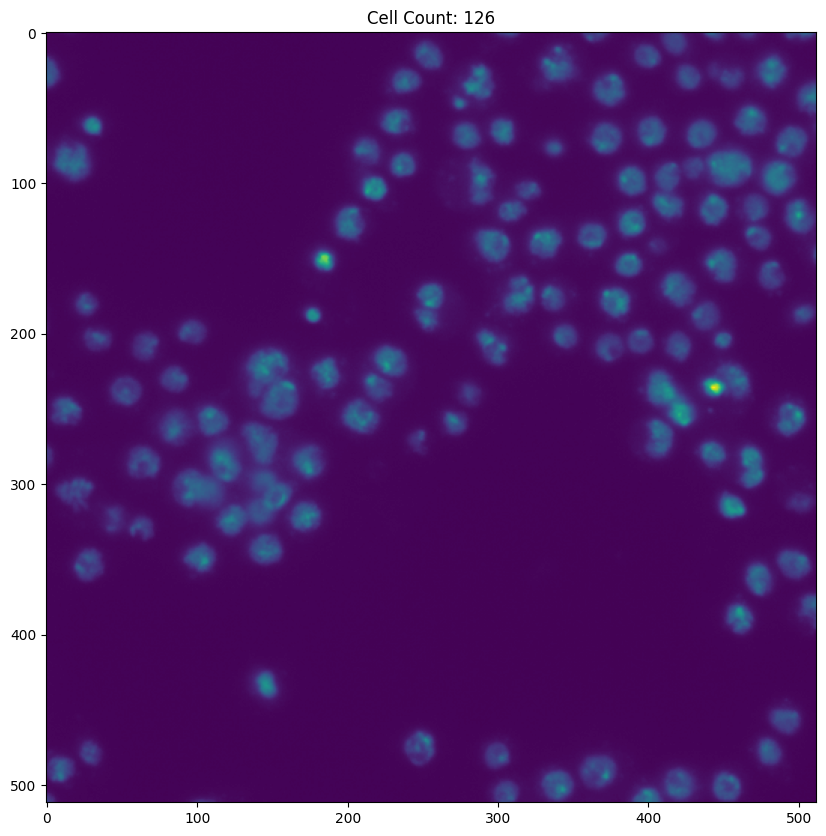

In [8]:
i = 5

plt.figure(figsize=(10, 10))
plt.imshow(train_x[i])
plt.title(f"Cell Count: {train_y[i]}")
plt.show()

In [9]:
train_x = np.array(train_x.reshape(-1, 512, 512, 1), dtype=np.float32)
train_y = np.array(train_y.reshape(-1), dtype=np.float32)

val_x = np.array(val_x.reshape(-1, 512, 512, 1), dtype=np.float32)
val_y = np.array(val_y.reshape(-1), dtype=np.float32)

test_x = np.array(test_x.reshape(-1, 512, 512, 1), dtype=np.float32)
test_y = np.array(test_y.reshape(-1), dtype=np.float32)



train_data = NumpyDataset(train_x, train_y)
val_data = NumpyDataset(val_x, val_y)
test_data = NumpyDataset(test_x, test_y)

In [ ]:
regression_metric = dc.metrics.Metric(dc.metrics.rms_score)

model = CNN(n_tasks=1, n_features=1, dims=2, layer_filters = [32, 64, 128, 128, 64, 32], kernel_size=3, learning_rate=5e-4,
            mode='regression', padding='same', batch_size=4, residual=True, dropouts=0.1, pool_type='average')

callback = dc.models.ValidationCallback(val_data, 50, [regression_metric])

avg_loss = model.fit(train_data, nb_epoch=20, callbacks=callback)

Step 50 validation: rms_score=49.3286
Step 100 validation: rms_score=46.1042
Step 150 validation: rms_score=28.5614


Train loss:  29.3
Val Loss:  24.4
Test Loss:  18.6


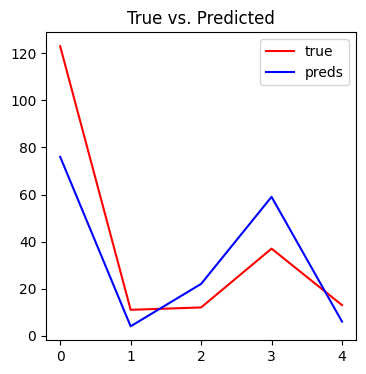

In [13]:
test_metric = dc.metrics.Metric(dc.metrics.mean_absolute_error)
preds = np.array(model.predict(train_data), dtype=np.uint32)
print("Train loss: ", test_metric.compute_metric(train_y, preds))
preds = np.array(model.predict(val_data), dtype=np.uint32)
print("Val Loss: ", test_metric.compute_metric(val_y, preds))
preds = np.array(model.predict(test_data), dtype=np.uint32)
print("Test Loss: ", test_metric.compute_metric(test_y, preds))
plt.figure(figsize=(4, 4))
plt.title("True vs. Predicted")
plt.plot(test_y, color='red', label='true')
plt.plot(preds, color='blue', label='preds')
plt.legend()
plt.show()

In [19]:
print(f"Mean of True Values: {np.mean(test_y):.2f}")
print(f"Mean of Predictions: {np.mean(preds):.2f}")
diff = []
for i in range(len(test_y)):
  diff.append(abs(test_y[i] - preds[i]))
  print(f"Difference: {abs(test_y[i] - preds[i])}")
  print(f"True Value: {test_y[i]}")
  print(f"Prediction: {preds[i]}")
print(f"Max of Difference: {np.max(diff)}")

Mean of True Values: 39.20
Mean of Predictions: 33.40
Difference: [47.]
True Value: 123.0
Prediction: [76]
Difference: [7.]
True Value: 11.0
Prediction: [4]
Difference: [10.]
True Value: 12.0
Prediction: [22]
Difference: [22.]
True Value: 37.0
Prediction: [59]
Difference: [7.]
True Value: 13.0
Prediction: [6]
Max of Difference: 47.0
